In [12]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [20]:
data=pd.read_csv('Database/train.csv', index_col=0, low_memory=False)
target = data['RANK']
numerical_df = data.select_dtypes(include=['number'])
categorical_df = data[data.columns.difference(numerical_df.columns)]
categorical_df=pd.concat([categorical_df, target], axis=1)

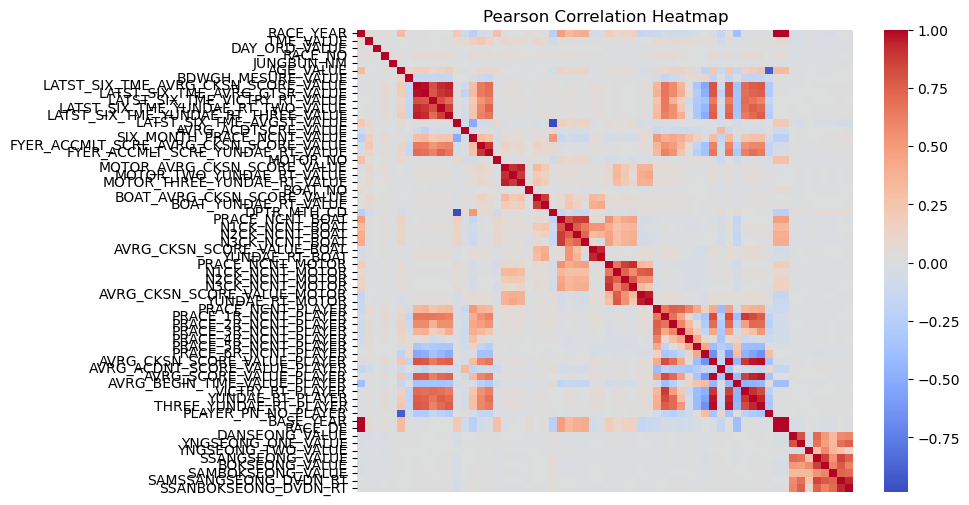

In [24]:
df_1 = numerical_df.drop(columns=['RANK'])
corr = df_1.corr()
corr_df = pd.DataFrame(corr, index=df_1.columns, columns=df_1.columns)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, xticklabels=0, yticklabels=corr_df.columns, cmap='coolwarm')
plt.title('Pearson Correlation Heatmap')
plt.show()

In [25]:
numerical_to_drop = set()
for i in range(len(corr_df.columns)):
    for j in range(i):
        if corr_df.iloc[i, j] >= 0.999:
            colname = corr_df.columns[i]
            numerical_to_drop.add(colname)

df_2 = numerical_df.drop(columns=numerical_to_drop)

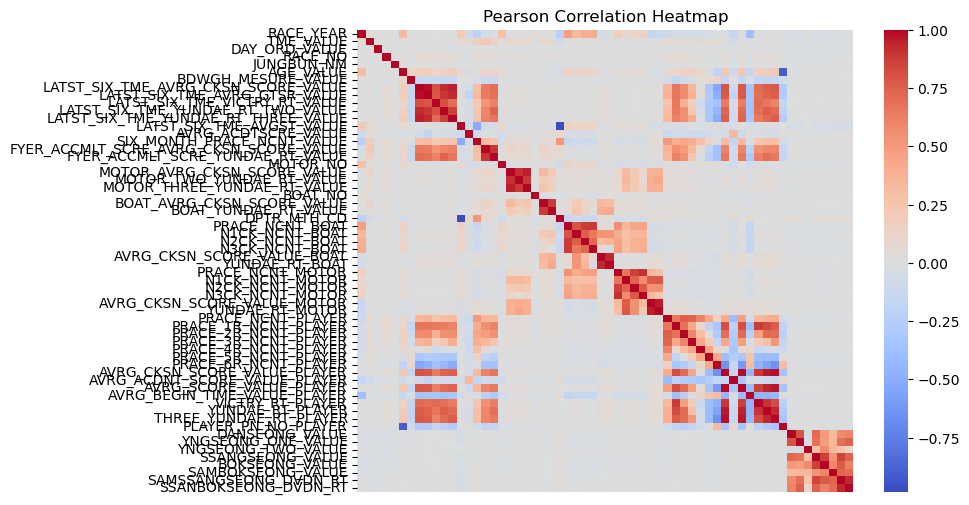

In [26]:
df_2 = df_2.drop(columns=['RANK'])
corr = df_2.corr()
corr_df = pd.DataFrame(corr, index=df_2.columns, columns=df_2.columns)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, xticklabels=0, yticklabels=corr_df.columns, cmap='coolwarm')
plt.title('Pearson Correlation Heatmap')
plt.show()

C:\Users\asas4\anaconda3\envs\Rainfall\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\asas4\anaconda3\envs\Rainfall\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


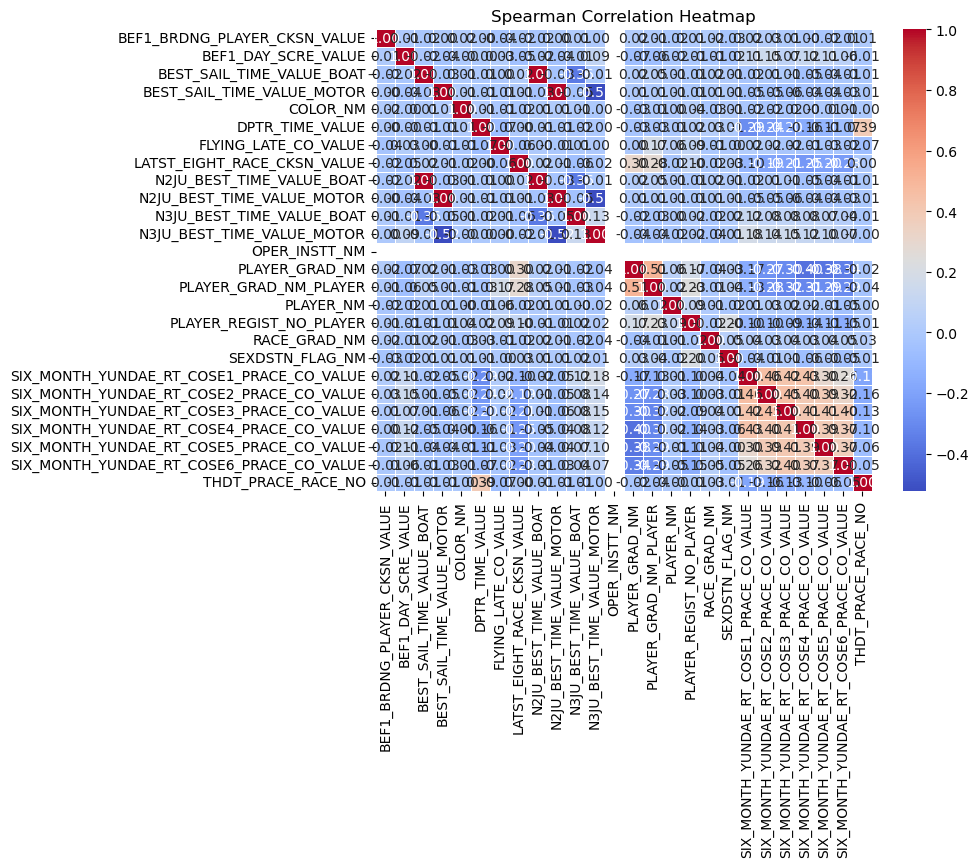

In [27]:
from scipy.stats import spearmanr

df_1 = categorical_df.drop(columns=['RANK'])
corr, _ = spearmanr(df_1.dropna())
corr_df = pd.DataFrame(corr, index=df_1.columns, columns=df_1.columns)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Spearman Correlation Heatmap')
plt.show()

In [28]:
categorical_to_drop = set()
for i in range(len(corr_df.columns)):
    for j in range(i):
        if corr_df.iloc[i, j] >= 0.999:
            colname = corr_df.columns[i]
            categorical_to_drop.add(colname)

df_3 = categorical_df.drop(columns=categorical_to_drop)

C:\Users\asas4\anaconda3\envs\Rainfall\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\asas4\anaconda3\envs\Rainfall\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


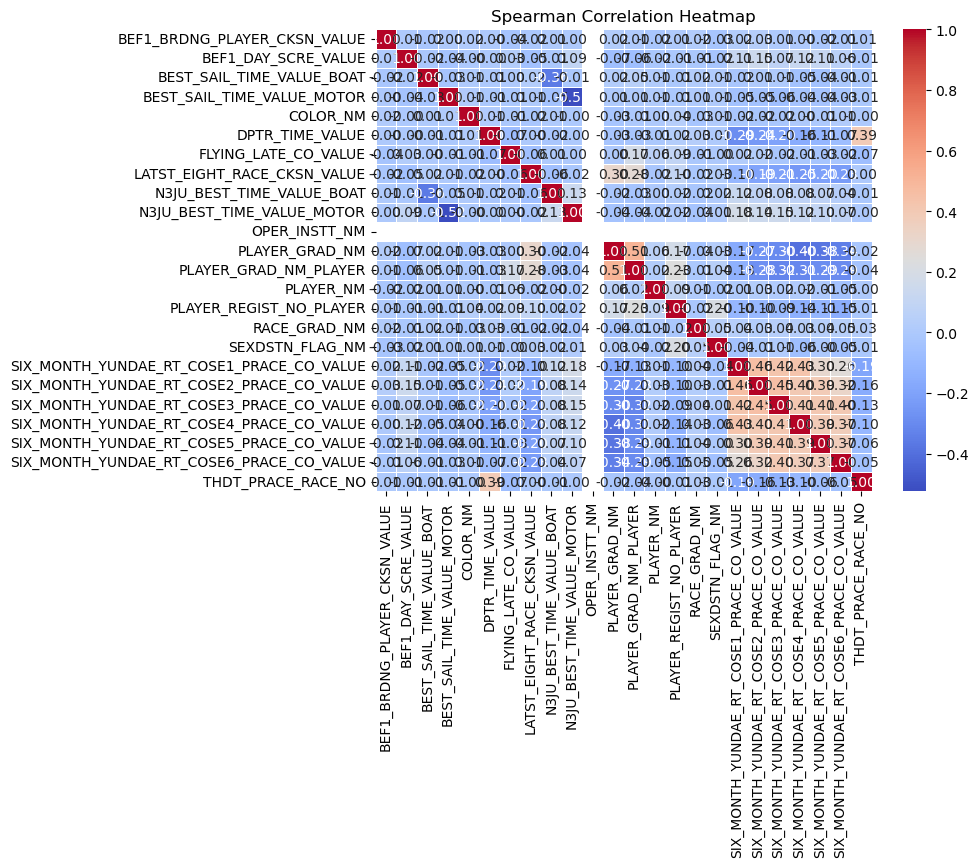

In [29]:
df_3 = df_3.drop(columns=['RANK'])
corr, _ = spearmanr(df_3.dropna())
corr_df = pd.DataFrame(corr, index=df_3.columns, columns=df_3.columns)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Spearman Correlation Heatmap')
plt.show()

## 배치로 묶기 위해 필요.
'RACE_YEAR', 경주년도
 'TME_VALUE', 회차값
 'DAY_ORD_VALUE', 일차값
 'RACE_NO', 경주번호

## 타겟칼럼 1,2,3까지는 순위가 있고 그 밑은 -1로 처리
 'RANK', 순위

## 필요없어 보이는 column.
 'RACE_GRAD_NM', 일반경주 or 특별경주
 'DPTR_TIME_VALUE', 출발시간 값/flying start 값 있어서 필요없어보임.
 'JUNGBUN_NM', 정번명/선수고유번호라는데 필요없어보임.
 'COLOR_NM', 색상명
 'PLAYER_NM', 선수명
 'THDT_PRACE_RACE_NO', 금일출주경주번호
 'BEF1_BRDNG_PLAYER_CKSN_VALUE', 전탑승선수
 'MOTOR_NO', 모터번호/ moter_df 다 합쳐서 필요없을듯
 'BOAT_NO', 보트번호/ boat_df 다 합쳐서 필요없을듯

## 중요한 column.
 'PLAYER_GRAD_NM', 선수등급 중요
 'SEXDSTN_FLAG_NM', 성별 아마도 중요
 'AGE_VALUE', 나이 별로 안중요
 'BDWGH_MESURE_VALUE', 몸무게 중요
 
 'LATST_SIX_TME_AVRG_CKSN_SCORE_VALUE', 최근6회차평균착순점수값
 'LATST_SIX_TME_AVRG_GTSR_VALUE', 최근6회차평균득점값
 'LATST_SIX_TME_VICTRY_RT_VALUE', 최근6회차승리율값
 'LATST_SIX_TME_YUNDAE_RT_TWO_VALUE', 최근6회차연대율2값
 'LATST_SIX_TME_YUNDAE_RT_THREE_VALUE', 최근6회차연대율3값
 'LATST_SIX_TME_AVGST_VALUE', 최근6회차평균ST값
 'LATST_EIGHT_RACE_CKSN_VALUE', 최근8경주착순값
 
 'FLYING_LATE_CO_VALUE', 플라잉 or 레이트 스타트 여부
 'AVRG_ACDTSCRE_VALUE', 평균사고점
 
 'FYER_ACCMLT_SCRE_AVRG_CKSN_SCORE_VALUE', 년간누적성적평균착순점수값
 'FYER_ACCMLT_SCRE_YUNDAE_RT_VALUE', 년간누적성적연대율값
 
 
## 좉같이 되어있어서 해석을 못함. 어떻게 쓸지 모르겠는 column
 'BEF1_DAY_SCRE_VALUE', 전일성적값
 'SIX_MONTH_PRACE_NCNT_VALUE', 6개월출주횟수값
 'SIX_MONTH_YUNDAE_RT_COSE1_PRACE_CO_VALUE', 6개월연대율1코스출주수값
 'SIX_MONTH_YUNDAE_RT_COSE2_PRACE_CO_VALUE', 6개월연대율2코스출주수값
 'SIX_MONTH_YUNDAE_RT_COSE3_PRACE_CO_VALUE', 6개월연대율3코스출주수값
 'SIX_MONTH_YUNDAE_RT_COSE4_PRACE_CO_VALUE', 6개월연대율4코스출주수값
 'SIX_MONTH_YUNDAE_RT_COSE5_PRACE_CO_VALUE', 6개월연대율5코스출주수값
 'SIX_MONTH_YUNDAE_RT_COSE6_PRACE_CO_VALUE', 6개월연대율6코스출주수값
 

## 출주표에 원래 있던 모터 and 보트 정보
 'MOTOR_AVRG_CKSN_SCORE_VALUE', 모터평균착순점수값
 'MOTOR_TWO_YUNDAE_RT_VALUE', 모터2연대율값
 'MOTOR_THREE_YUNDAE_RT_VALUE', 모터3연대율값

 'BOAT_AVRG_CKSN_SCORE_VALUE', 보트평균착순점수값
 'BOAT_YUNDAE_RT_VALUE', 보트연대율값
 'DPTR_MTH_CD', 출발방법코드
 
----------------------------------------------------------------------------------------
이 밑 부턴 실제 test셋을 구할수 있는지 모르겠음

## 출주표에 없는 보트정보
  데이터 스키마가 없어서 못적음.
 'PRACE_NCNT_BOAT',
 'N1CK_NCNT_BOAT',
 'N2CK_NCNT_BOAT',
 'N3CK_NCNT_BOAT',
 'AVRG_CKSN_SCORE_VALUE_BOAT',
 'YUNDAE_RT_BOAT',
 'BEST_SAIL_TIME_VALUE_BOAT',
 'N2JU_BEST_TIME_VALUE_BOAT',
 'N3JU_BEST_TIME_VALUE_BOAT',
 
## 출주표에 없는 모터정보
 'PRACE_NCNT_MOTOR', 출주횟수
 'N1CK_NCNT_MOTOR', 1착횟수
 'N2CK_NCNT_MOTOR', 2착횟수
 'N3CK_NCNT_MOTOR', 3착횟수
 'AVRG_CKSN_SCORE_VALUE_MOTOR', 평균착순점수값
 'YUNDAE_RT_MOTOR', 연대율
 'BEST_SAIL_TIME_VALUE_MOTOR', 최고항주시간값
 'N2JU_BEST_TIME_VALUE_MOTOR', 2주회최고시간값
 'N3JU_BEST_TIME_VALUE_MOTOR', 3주회최고시간값
 
## 출주표에 없는 선수정보
  데이터 스키마가 없어서 못적음.
 'PLAYER_REGIST_NO_PLAYER',
 'PRACE_NCNT_PLAYER',
 'PRACE_1R_NCNT_PLAYER',
 'PRACE_2R_NCNT_PLAYER',
 'PRACE_3R_NCNT_PLAYER',
 'PRACE_4R_NCNT_PLAYER',
 'PRACE_5R_NCNT_PLAYER',
 'PRACE_6R_NCNT_PLAYER',
 'AVRG_CKSN_SCORE_VALUE_PLAYER',
 'AVRG_ACDNT_SCORE_VALUE_PLAYER',
 'AVRG_SCORE_VALUE_PLAYER',
 'AVRG_BEGIN_TIME_VALUE_PLAYER',
 'VICTRY_RT_PLAYER',
 'YUNDAE_RT_PLAYER',
 'THREE_YUNDAE_RT_PLAYER',
 'PLAYER_GRAD_NM_PLAYER',
 'PLAYER_PN_NO_PLAYER',
 
## 배당정보인데 순위예측할거면 필요없지만 일단 붙여놓음.
 'OPER_INSTT_NM', 운영기관명
 'BASE_YEAR', 기준년도
 'RACE_DE', 경주일자
 'DANSEONG_VALUE', 단승값
 'YNGSEONG_ONE_VALUE', 연승1값
 'YNGSEONG_TWO_VALUE', 연승2값
 'SSANGSEONG_VALUE', 쌍승값
 'BOKSEONG_VALUE', 복승값
 'SAMBOKSEONG_VALUE', 삼복승값
 'SAMSSANGSEONG_DVDN_RT', 삼쌍승배당율
 'SSANBOKSEONG_DVDN_RT' 쌍복승배당율